In [1]:
!pip install deepchem rdkit

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
df=pd.read_csv('/content/drive/MyDrive/bace.csv')

In [4]:
df

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [5]:
df.describe()

,Class,pIC50,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.456709,6.521991,479.661988,3.177080,3.732981,2.001322,8.049570,34.089227,0.522802,2.317250,...,52.348846,48.763740,181.835580,148.442348,30.371697,3.488650,11.740560,1.239762,14.387597,783.779907
std,0.498287,1.342417,122.083053,1.396633,1.444778,1.629343,4.741135,8.520088,1.162539,1.612558,...,25.993800,18.201519,99.717702,60.548833,12.162452,5.148336,9.073406,3.293804,13.329890,444.468806
min,0.000000,2.544546,138.187000,-4.361100,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,-3.551821,1.916970,-5.536391,-2.216191,-7.286308,-6.106466,-7.379991,-1.273524,1.000000
25%,0.000000,5.585027,389.331300,2.335500,3.000000,0.000000,4.000000,28.000000,0.000000,1.000000,...,34.319988,36.547150,102.233770,102.510450,20.132990,0.000000,7.980170,0.000000,0.000000,407.000000
50%,0.000000,6.761954,463.628300,3.171300,4.000000,2.000000,7.000000,33.000000,0.000000,2.000000,...,51.479984,47.624382,171.917220,140.683620,30.107586,0.550130,8.188327,0.000000,21.710098,788.000000
75%,1.000000,7.540000,564.639530,4.015500,4.000000,3.000000,11.000000,40.000000,1.000000,3.000000,...,66.553795,58.844093,253.679080,185.659260,37.133846,7.980170,15.879790,0.000000,24.663788,1167.000000
max,1.000000,10.522879,1350.473300,7.617400,12.000000,15.000000,40.000000,97.000000,10.000000,12.000000,...,161.342860,124.272730,865.473330,378.516270,121.671900,29.823961,80.218018,16.681131,61.659470,1547.000000


In [ ]:
cols

['mol',
 'CID',
 'Class',
 'Model',
 'pIC50',
 'MW',
 'AlogP',
 'HBA',
 'HBD',
 'RB',
 'HeavyAtomCount',
 'ChiralCenterCount',
 'ChiralCenterCountAllPossible',
 'RingCount',
 'PSA',
 'Estate',
 'MR',
 'Polar',
 'sLi_Key',
 'ssBe_Key',
 'ssssBem_Key',
 'sBH2_Key',
 'ssBH_Key',
 'sssB_Key',
 'ssssBm_Key',
 'sCH3_Key',
 'dCH2_Key',
 'ssCH2_Key',
 'tCH_Key',
 'dsCH_Key',
 'aaCH_Key',
 'sssCH_Key',
 'ddC_Key',
 'tsC_Key',
 'dssC_Key',
 'aasC_Key',
 'aaaC_Key',
 'ssssC_Key',
 'sNH3_Key',
 'sNH2_Key',
 'ssNH2_Key',
 'dNH_Key',
 'ssNH_Key',
 'aaNH_Key',
 'tN_Key',
 'sssNH_Key',
 'dsN_Key',
 'aaN_Key',
 'sssN_Key',
 'ddsN_Key',
 'aasN_Key',
 'ssssN_Key',
 'daaN_Key',
 'sOH_Key',
 'dO_Key',
 'ssO_Key',
 'aaO_Key',
 'aOm_Key',
 'sOm_Key',
 'sF_Key',
 'sSiH3_Key',
 'ssSiH2_Key',
 'sssSiH_Key',
 'ssssSi_Key',
 'sPH2_Key',
 'ssPH_Key',
 'sssP_Key',
 'dsssP_Key',
 'ddsP_Key',
 'sssssP_Key',
 'sSH_Key',
 'dS_Key',
 'ssS_Key',
 'aaS_Key',
 'dssS_Key',
 'ddssS_Key',
 'ssssssS_Key',
 'Sm_Key',
 'sCl_Key'

In [6]:
df_bace=df[['mol','pIC50']]

In [7]:
df_bace

,mol,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298


In [11]:
def canonicalize_smiles(smiles):
        '''This function takes a non-canonical SMILES and
        returns the canonical version

        Args:
            -smiles: str, non-canonical SMILES of a molecule

        Out:
            - canonical_smiles: str, canonical SMILES of the molecule
        '''

        mol = Chem.MolFromSmiles(smiles) # create a mol object from input smiles

        canonical_smiles = Chem.MolToSmiles(mol) # convert the previous mol object to SMILES using Chem.MolToSmiles()


        return canonical_smiles


    # apply canonical smiles to our df
df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


/tmp/ipython-input-1363223368.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


In [12]:
df_bace

,mol,pIC50,canonical_smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


<Axes: >

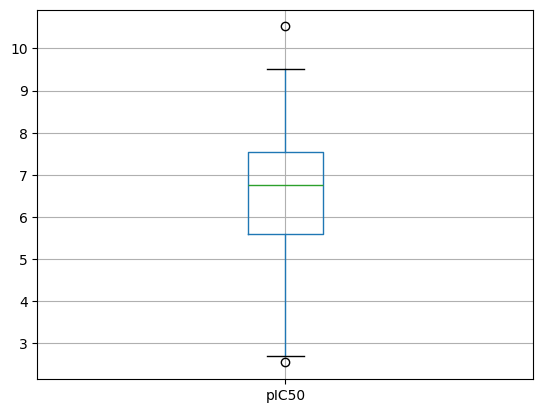

In [50]:
df_bace.boxplot(column='pIC50')

<Axes: >

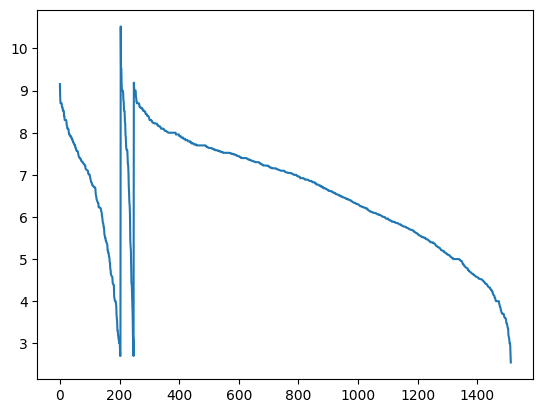

In [52]:
#
df_bace['pIC50'].plot()

In [13]:
    num_rows = len(df_bace)
    num_unique_smiles = df_bace['canonical_smiles'].nunique()

    print(f"\nTotal number of rows in the DataFrame: {num_rows}")
    print(f"\nNumber of unique canonical SMILES: {num_unique_smiles}\n")

    # drop old 'smiles' column
    df_bace = df_bace.drop(columns='mol')


    print(f"\n--- BACE Preprocessing Report ---\n")
    print(f"Final dataset size: {df_bace.shape}\n")



Total number of rows in the DataFrame: 1513

Number of unique canonical SMILES: 1513


--- BACE Preprocessing Report ---

Final dataset size: (1513, 2)



In [15]:
total_na_values = df_bace.isna().sum().sum()
print(f"\nTOTAL number of Na in the DataFrame: {total_na_values}")
non_numeric_df = df_bace.select_dtypes(exclude=np.number)
print("\nNon-Numeric Columns (Categorical/Objects):")
print(non_numeric_df.columns.tolist())


TOTAL number of Na in the DataFrame: 0

Non-Numeric Columns (Categorical/Objects):
['canonical_smiles']


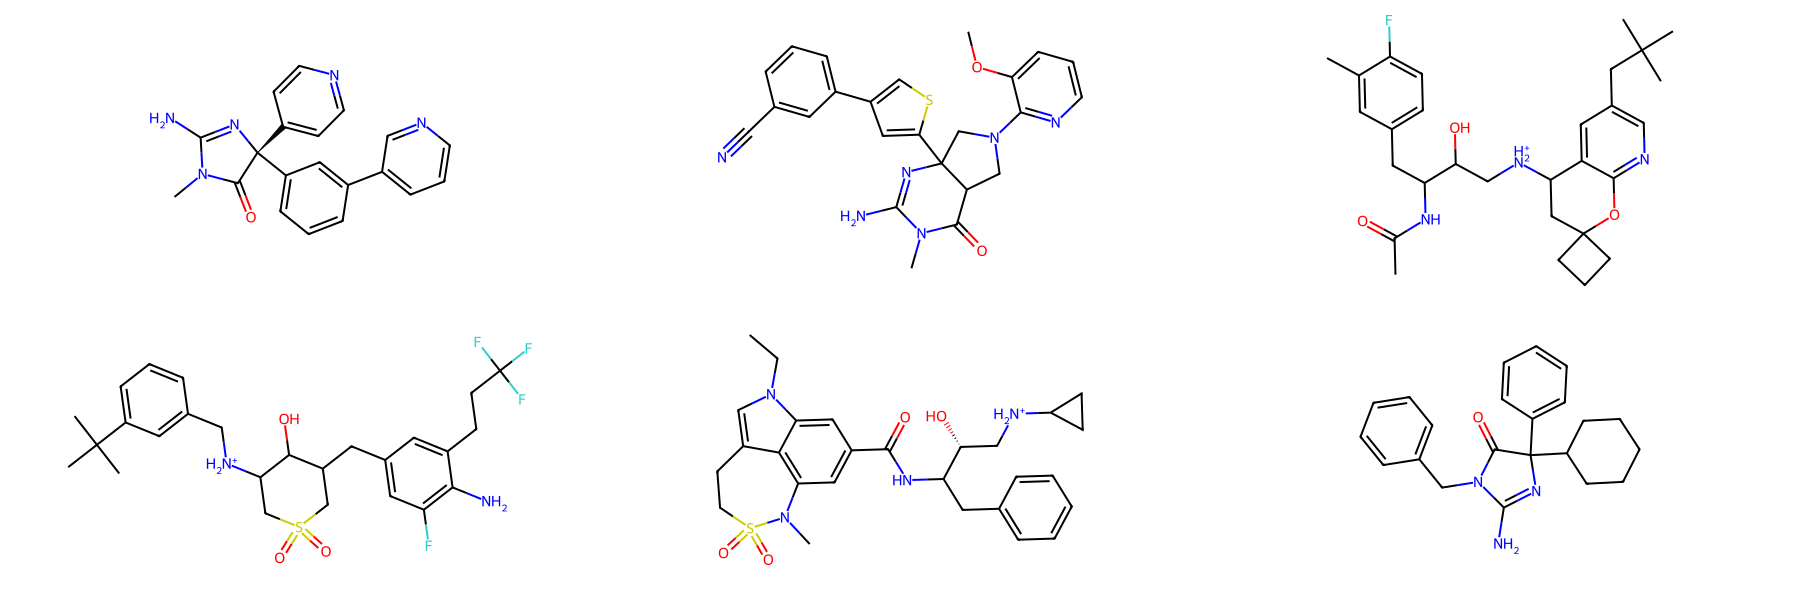

In [17]:

# Visualize some of the molecules of this dataset
n=6
df_sample=df_bace.sample(n)

smiles = df_sample['canonical_smiles'].values
legend = df_sample['pIC50'].values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
)

In [ ]:
mf_features

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [21]:
from deepchem.feat import RDKitDescriptors
featurizer = RDKitDescriptors()
features = featurizer.featurize(df_bace['canonical_smiles'])
print(f"Number of generated molecular descriptors: {features.shape[1]}")

Number of generated molecular descriptors: 217


In [19]:
mf_featurizer = dc.feat.MACCSKeysFingerprint()

# compute molecular descriptors
mf_features = mf_featurizer.featurize(df_bace['canonical_smiles'])
mf_features.shape[1]

167

In [ ]:
features

array([[1.28649765e+01, 1.28649765e+01, 5.63499972e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43254998e+01, 1.43254998e+01, 1.89075625e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37847268e+01, 1.37847268e+01, 9.67386763e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.17256285e+01, 1.17256285e+01, 9.50071911e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19181367e+01, 1.19181367e+01, 9.61238289e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17122412e+01, 1.17122412e+01, 1.18459940e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
features.shape[1]

217

In [22]:
features = features[:, ~np.isnan(features).any(axis=0)]
print(f"Number of molecular descriptors without invalid values: {features.shape[1]}")

Number of molecular descriptors without invalid values: 217


In [23]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
features = selector.fit_transform(features)
print(f"Number of molecular descriptors after removing zero-variance features: {features.shape[1]}")

Number of molecular descriptors after removing zero-variance features: 192


In [24]:
mf_features = selector.fit_transform(mf_features)
print(f"Number of molecular descriptors after removing zero-variance features: {mf_features.shape[1]}")

Number of molecular descriptors after removing zero-variance features: 142


In [28]:
from sklearn.model_selection import train_test_split
X = features
y=df_bace['pIC50']
# training data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

In [29]:
X_train

array([[1.24949645e+01, 1.24949645e+01, 3.57979025e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39713014e+01, 1.39713014e+01, 1.98670700e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37852132e+01, 1.37852132e+01, 6.89255627e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.36970544e+01, 1.36970544e+01, 1.13205002e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26219224e+01, 1.26219224e+01, 2.77626081e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32749764e+01, 1.32749764e+01, 7.46996870e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [30]:
X_mf = mf_features
y=df_bace['pIC50']
# training data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_mf_train, X_mf_test, y_train, y_test = train_test_split(
    X_mf, y, train_size=0.8, random_state=42)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# save original X
X_train_ori = X_train
X_test_ori = X_test
# transform data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor
ranf_reg = RandomForestRegressor(n_estimators=15, random_state=0)  # using 10 trees and seed=0

# XGBoost regressor
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=15, random_state=0)  # using 10 trees and seed=0

In [33]:
from sklearn.metrics import mean_squared_error

def train_test_model(model, X_train, y_train, X_test, y_test):
    """
    Function that trains a model, and tests it.
    Inputs: sklearn model, train_data, test_data
    """
    # Train model
    model.fit(X_train, y_train)

    # Calculate RMSE on training
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_train_mse = mean_squared_error(y_train, y_pred_train)
    model_test_mse = mean_squared_error(y_test, y_pred_test)
    model_train_rmse = model_train_mse ** 0.5
    model_test_rmse = model_test_mse ** 0.5
    print(f"RMSE on train set: {model_train_rmse:.3f}, and test set: {model_test_rmse:.3f}.\n")


# Train and test the random forest model
print("Evaluating Random Forest Model.")
train_test_model(ranf_reg, X_train, y_train, X_test, y_test)

# Train and test XGBoost model
print("Evaluating XGBoost model.")
train_test_model(xgb_reg, X_train, y_train, X_test, y_test)

Evaluating Random Forest Model.
RMSE on train set: 0.333, and test set: 0.741.

Evaluating XGBoost model.
RMSE on train set: 0.368, and test set: 0.720.



In [34]:
#using mf features next
print("Evaluating Random Forest Model on mf .")
train_test_model(ranf_reg, X_mf_train, y_train, X_mf_test, y_test)

# Train and test XGBoost model
print("Evaluating XGBoost model on mf.")
train_test_model(xgb_reg, X_mf_train, y_train, X_mf_test, y_test)

Evaluating Random Forest Model on mf .
RMSE on train set: 0.391, and test set: 0.820.

Evaluating XGBoost model on mf.
RMSE on train set: 0.532, and test set: 0.794.



In [46]:
from sklearn.model_selection import KFold, cross_val_score
n_folds = 10

# Create a KFold object with n_folds folds and shuffle the data before creating the folds
kf = KFold(n_splits=n_folds,
                           shuffle=True # shuffle the data
                          )


# Keep the indices to use the same kfolds mutliple times:
kf_indices = list(kf.split(X_train))

rf_reg_cv = cross_val_score(ranf_reg, X_train, y_train, # data
                                                  cv=kf_indices, # cross validation indices
                                                  scoring='neg_mean_squared_error'# metric
                                                  )




In [49]:
print("Cross validation rmse  : %.3f" % (np.sqrt(np.mean(rf_reg_cv)*-1)))

Cross validation rmse  : 0.786


In [ ]:
from sklearn.svm import SVR

# create a model
svm_reg = SVR(C=3.0, epsilon=0.3)

# train and evaluate the model
print("Evaluating SVR model.")
train_test_model(svm_reg, X_train, y_train, X_test, y_test)

Evaluating SVR model.
RMSE on train set: 0.566, and test set: 0.782.



In [ ]:
# calculate IQR for column Height
Q1 = df['pIC50'].quantile(0.25)
Q3 = df['pIC50'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['pIC50'] < Q1 - threshold * IQR) | (df['pIC50'] > Q3 + threshold * IQR)]